In [19]:
import os.path
import torch
from PIL import Image
from win32api import GetSystemMetrics
from torchvision import models
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
resnet = models.resnet101(pretrained=True)
alexnet = models.alexnet(pretrained=True)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

In [21]:
results_alexnet = []
results_resnet = []
imgs = []

path = "data/cat"
valid_images = [".jpg", ".png"]

with open('data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

for i in os.listdir(path):
    ext = os.path.splitext(i)[1]
    if ext.lower() not in valid_images:
        continue
    img = Image.open(os.path.join(path, i))
    imgs.append(img)
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)

    # resnet
    resnet.eval()
    out = resnet(batch_t)
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 1
    result = list([labels[index[0]], percentage[index[0]].item()])
    results_resnet.append(result)

    # alexnet
    alexnet.eval()
    out = alexnet(batch_t)
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 1
    result = list([labels[index[0]], percentage[index[0]].item()])
    results_alexnet.append(result)


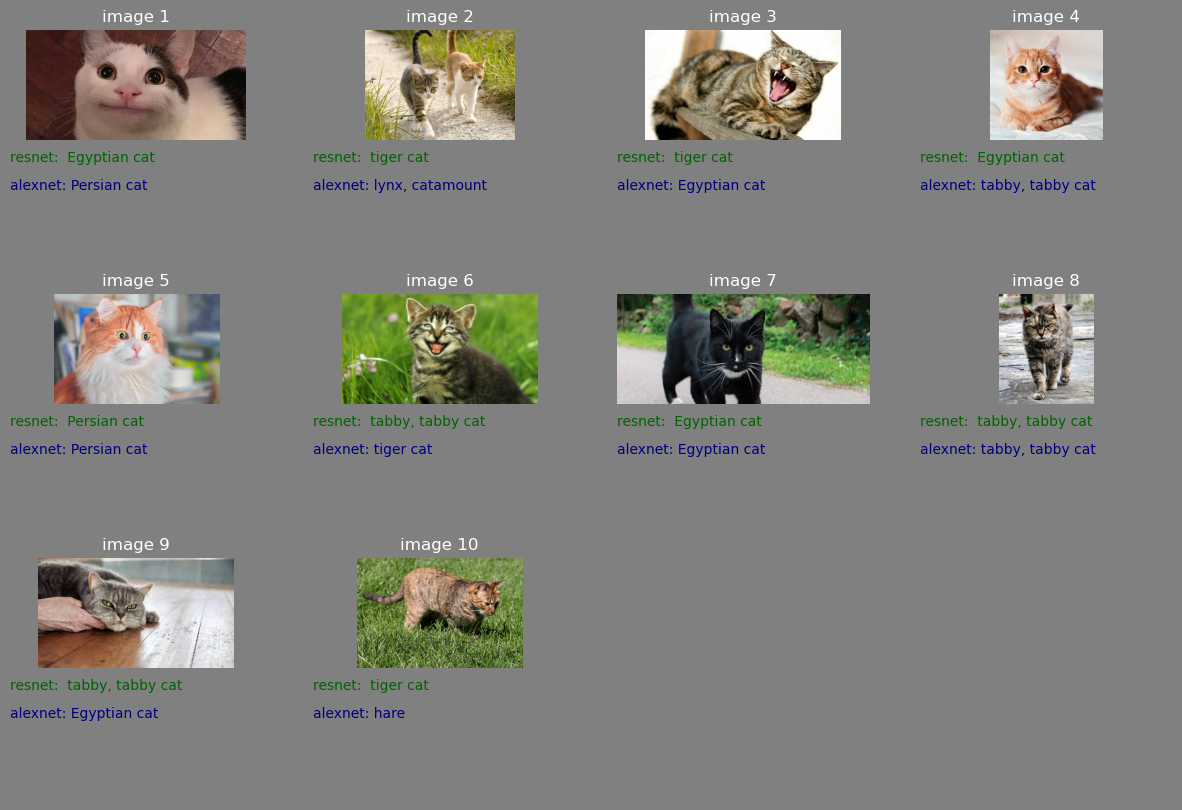

In [22]:
img_number = np.size(imgs)
columns = math.ceil(np.sqrt(img_number))
if img_number > columns*(columns-1):
    rows = 2*(columns)
else:
    rows = 2*(columns-1)

fig = plt.figure(figsize=(15, 10), facecolor='gray')


def __mod__(a, b):
    x = a % b
    if x == 0:
        return bool(1)
    else:
        return bool(0)


offset = 0

for i in range(img_number):
    fig.add_subplot(rows, columns, i + 1 + offset)
    plt.title("image " + str(i+1), color='white')
    plt.imshow(imgs[i])
    plt.axis('off')
    fig.add_subplot(rows, columns, i + 1 + columns + offset)
    plt.text(0, 1, "resnet:  " + str(results_resnet[i][0]), color='darkgreen', fontfamily='sans-serif')
    plt.text(0, 0.75, "alexnet: " + str(results_alexnet[i][0]), color='navy', fontfamily='sans-serif')
    plt.axis('off')
    if __mod__(i + 1, columns):
        offset = offset + columns
plt.show()